In [1]:
%matplotlib inline

import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
penguins["id"] = np.random.choice(np.arange(1000, 2000), size=344, replace=False)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1732
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1573
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1440
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,1707
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1123
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,1697
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1958
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1182
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1989


# polluted data

In [4]:
# duplicated data
penguins_dup = penguins.query("bill_length_mm < 35").sample(n=300, replace=True)

In [5]:
# wrong data
penguins_wrong = penguins.sample(n=30, replace=False)
penguins_wrong.dropna(inplace=True)
penguins_wrong["bill_length_mm"] = penguins_wrong["bill_length_mm"]/10
penguins_wrong["bill_depth_mm"] = penguins_wrong["bill_depth_mm"]
penguins_wrong["flipper_length_mm"] = penguins_wrong["flipper_length_mm"]

In [6]:
penguins_kses = pd.concat([penguins, penguins, penguins_wrong], axis=0).sample(frac=1).reset_index()
penguins_kses.drop("index", axis=1, inplace=True)
penguins_kses.to_pickle("penguins_kses.pkl")
penguins_kses.to_csv("penguins_kses.csv", index=False)

# original data

In [7]:
# encoder
from sklearn.preprocessing import OneHotEncoder

# machine learning models
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# data split
from sklearn.model_selection import train_test_split

In [8]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   id                 344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [9]:
penguins.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,1507.688953
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,295.114228
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,1002.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,1257.750000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,1506.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,1763.250000


In [10]:
penguins.dropna(inplace=True)

In [11]:
penguins.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,1503.492492
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,297.466315
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,1002.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,1247.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,1502.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,1767.000000


In [12]:
p_Train, p_test = train_test_split(penguins, test_size=0.2, stratify=penguins[["species", "island", "sex"]])
p_train, p_val = train_test_split(p_Train, test_size=0.25, stratify=p_Train[["species", "island", "sex"]])

In [13]:
X_cols = ["species", "island", "sex", "bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
y_col = "body_mass_g"

In [14]:
X_Train = p_Train[X_cols]
X_train = p_train[X_cols]
X_val = p_val[X_cols]
X_test = p_test[X_cols]

y_Train = p_Train[y_col]
y_train = p_train[y_col]
y_val = p_val[y_col]
y_test = p_test[y_col]

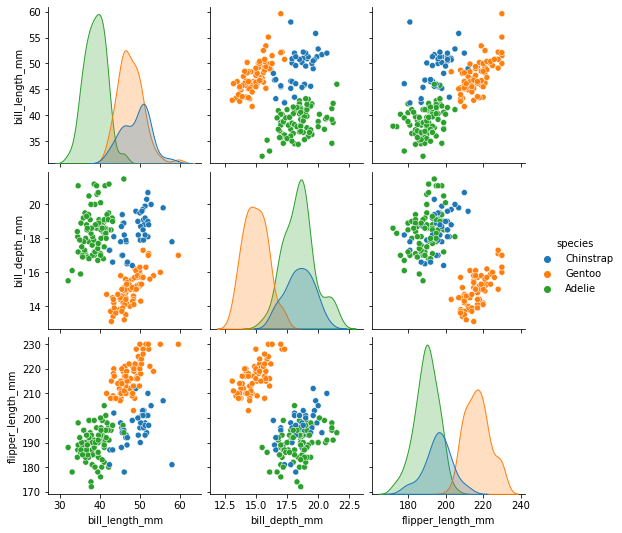

In [15]:
sns.pairplot(X_train, hue="species")

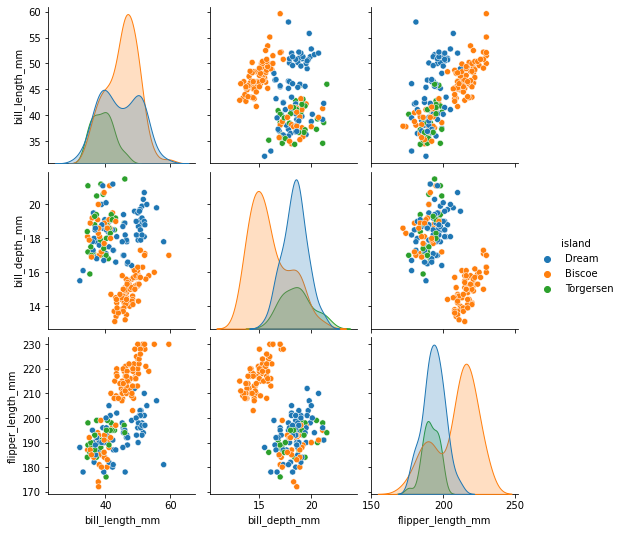

In [16]:
sns.pairplot(X_train, hue="island")

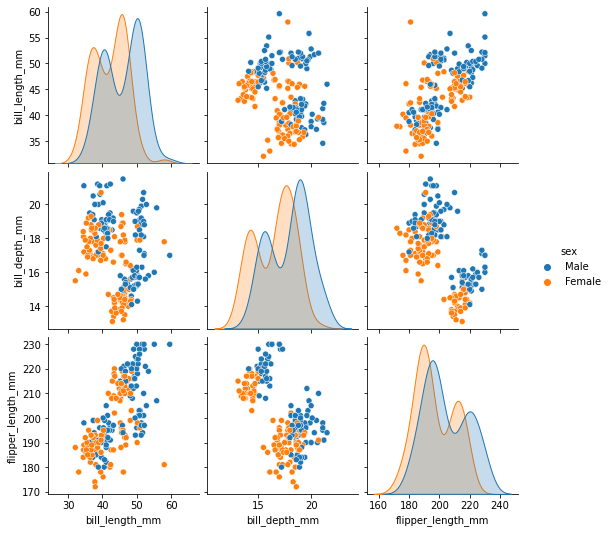

In [17]:
sns.pairplot(X_train, hue="sex")

<AxesSubplot:xlabel='species', ylabel='count'>

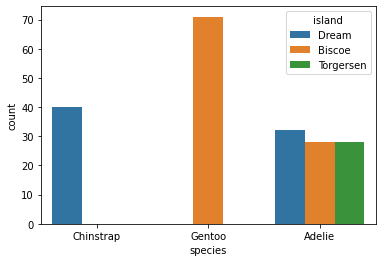

In [18]:
sns.countplot(x="species", hue="island", data=X_train)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

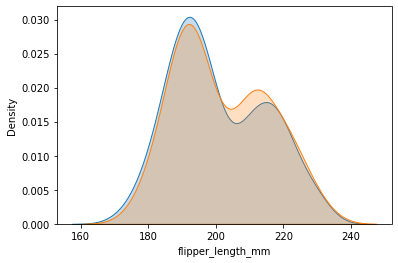

In [19]:
sns.kdeplot(x="flipper_length_mm", data=X_train, fill=True)
sns.kdeplot(x="flipper_length_mm", data=X_test, fill=True)

In [20]:
cat_features = ["species", "island", "sex"]
cat_transformer = OneHotEncoder(sparse=False)

num_features = list(set(X_cols) - set(cat_features))
num_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features), 
                                               ("cat", cat_transformer, cat_features)])

model = Pipeline(steps=[("preprocessor", preprocessor), 
                        ("rf", RandomForestRegressor())])

In [21]:
model.fit(X_Train, y_Train)
y_pred_Train = model.predict(X_Train)
y_pred_test = model.predict(X_test)

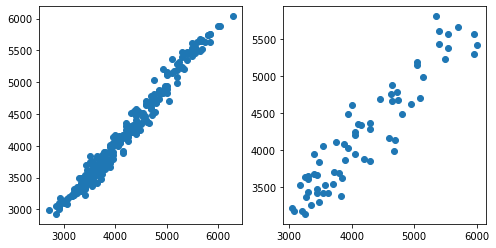

In [24]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
axs[0].scatter(y_Train, y_pred_Train)
axs[1].scatter(y_test, y_pred_test)

In [25]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_test)

0.8681892544166292

In [33]:
penguins_kses = pd.read_csv("penguins_kses.csv")

In [34]:
penguins_kses.dropna(inplace=True)

(array([ 29.,   0.,   0.,   0.,   0.,  82., 208., 196., 166.,  14.]),
 array([ 3.45 ,  9.065, 14.68 , 20.295, 25.91 , 31.525, 37.14 , 42.755,
        48.37 , 53.985, 59.6  ]),
 <BarContainer object of 10 artists>)

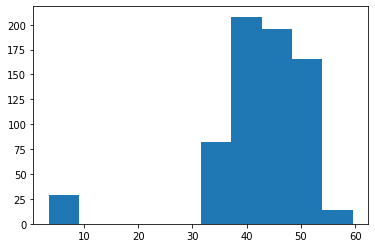

In [35]:
plt.hist(penguins_kses["bill_length_mm"])

In [36]:
pp_Train, pp_test = train_test_split(penguins_kses, test_size=0.2, stratify=penguins_kses[["species", "island", "sex"]])
pp_train, pp_val = train_test_split(pp_Train, test_size=0.25, stratify=pp_Train[["species", "island", "sex"]])

In [37]:
X_Train = pp_Train[X_cols]
X_train = pp_train[X_cols]
X_val = pp_val[X_cols]
X_test = pp_test[X_cols]

y_Train = pp_Train[y_col]
y_train = pp_train[y_col]
y_val = pp_val[y_col]
y_test = pp_test[y_col]

In [38]:
model.fit(X_Train, y_Train)
y_pred_Train = model.predict(X_Train)
y_pred_test = model.predict(X_test)

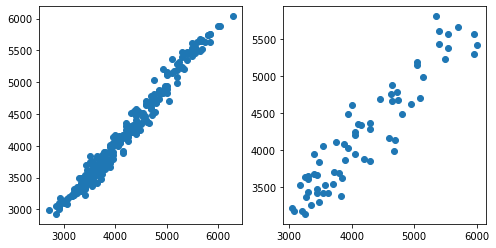

In [24]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
axs[0].scatter(y_Train, y_pred_Train)
axs[1].scatter(y_test, y_pred_test)

In [39]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_test)

0.9262355737047637